# Flight cancellations in 2015

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
flights = pd.read_csv("/Users/matthewcavanaugh/Desktop/IOD Data camp/Project 1/final data/flights fixed 2.csv")
flights

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL,SCHEDULED_DEPARTURE,CANCELLED,CANCELLATION_REASON,DISTANCE
0,2015,1,1,4,AA,N001AA,DFW,MEM,1345,1510,0,NaN,432.0
1,2015,1,1,4,AA,N001AA,MEM,DFW,1550,1730,0,NaN,432.0
2,2015,1,1,4,AA,N002AA,ORD,DFW,1845,2115,0,NaN,802.0
3,2015,1,1,4,AA,N003AA,DFW,ATL,1820,2120,0,NaN,731.0
4,2015,1,1,4,AA,N003AA,DFW,HDN,800,925,0,NaN,769.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,WN,N969WN,BWI,BUF,1340,1445,0,NaN,281.0
5819075,2015,12,31,4,WN,N969WN,BWI,DAL,1735,2010,0,NaN,1209.0
5819076,2015,12,31,4,WN,N969WN,BWI,MHT,945,1100,0,NaN,377.0
5819077,2015,12,31,4,WN,N969WN,MHT,BWI,1130,1305,0,NaN,377.0


## DATA CLEANING
#### For readability, let's change some technical terms into more standard ones. Replace airline codes with the names of the airlines, cancellation reason letter codes with the actual reasons, day of week numbers to the actual days, and month numbers with the actual months.

In [3]:
flights['AIRLINE'].replace({'UA': 'United', 'AA': 'American', 'US': 'US Airways', 'F9': 'Frontier', 'B6': 'JetBlue', 'OO': 'SkyWest', 'AS': 'Alaska', 'NK': 'Spirit', 'WN': 'Southwest', 'DL': 'Delta', 'EV': 'ExpressJet', 'HA': 'Hawaiian', 'MQ': 'American Eagle', 'VX': 'Virgin America'}, inplace=True)

/var/folders/cf/4zrkk0lx1nbdx9tpklpk4jc00000gn/T/ipykernel_94987/3163104562.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flights['AIRLINE'].replace({'UA': 'United', 'AA': 'American', 'US': 'US Airways', 'F9': 'Frontier', 'B6': 'JetBlue', 'OO': 'SkyWest', 'AS': 'Alaska', 'NK': 'Spirit', 'WN': 'Southwest', 'DL': 'Delta', 'EV': 'ExpressJet', 'HA': 'Hawaiian', 'MQ': 'American Eagle', 'VX': 'Virgin America'}, inplace=True)


In [4]:
flights['CANCELLATION_REASON'].replace({'A': 'Carrier', 'B': 'Weather', 'C': 'National Aviation System', 'D': 'Security'}, inplace=True) 

/var/folders/cf/4zrkk0lx1nbdx9tpklpk4jc00000gn/T/ipykernel_94987/1734622375.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flights['CANCELLATION_REASON'].replace({'A': 'Carrier', 'B': 'Weather', 'C': 'National Aviation System', 'D': 'Security'}, inplace=True)


In [5]:
day_map = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

flights.loc[:, 'DAY_OF_WEEK'] = flights['DAY_OF_WEEK'].map(day_map)

/var/folders/cf/4zrkk0lx1nbdx9tpklpk4jc00000gn/T/ipykernel_94987/3309792811.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Thursday' 'Thursday' 'Thursday' ... 'Thursday' 'Thursday' 'Thursday']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flights.loc[:, 'DAY_OF_WEEK'] = flights['DAY_OF_WEEK'].map(day_map)


In [6]:
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}


flights.loc[:, 'MONTH'] = flights['MONTH'].map(month_map)

/var/folders/cf/4zrkk0lx1nbdx9tpklpk4jc00000gn/T/ipykernel_94987/1107376981.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['January' 'January' 'January' ... 'December' 'December' 'December']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flights.loc[:, 'MONTH'] = flights['MONTH'].map(month_map)


In [7]:
flights.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL,SCHEDULED_DEPARTURE,CANCELLED,CANCELLATION_REASON,DISTANCE
0,2015,January,1,Thursday,American,N001AA,DFW,MEM,1345,1510,0,NaN,432.0
1,2015,January,1,Thursday,American,N001AA,MEM,DFW,1550,1730,0,NaN,432.0
2,2015,January,1,Thursday,American,N002AA,ORD,DFW,1845,2115,0,NaN,802.0
3,2015,January,1,Thursday,American,N003AA,DFW,ATL,1820,2120,0,NaN,731.0
4,2015,January,1,Thursday,American,N003AA,DFW,HDN,800,925,0,NaN,769.0


### Replace the three-letter IATA airport codes with the full names of the airports. To do this we'll need to use the airportsdata package.

In [8]:
!pip install airportsdata

In [9]:
import airportsdata

airports = airportsdata.load("IATA")

def convert_airport_code_to_name(code):
    try:
        return airports[code]["name"]
    except KeyError:
        return "Invalid"


flights['ORIGIN_AIRPORT'] = flights['ORIGIN_AIRPORT'].apply(convert_airport_code_to_name)
flights['DESTINATION_AIRPORT'] = flights['DESTINATION_AIRPORT'].apply(convert_airport_code_to_name)

#### We want reliably accurate counts of airports, so let's drop any rows with an invalid airport codes.

In [10]:
flights.drop(flights[flights['ORIGIN_AIRPORT'].str.contains('Invalid')].index, inplace=True)
flights.drop(flights[flights['DESTINATION_AIRPORT'].str.contains('Invalid')].index, inplace=True)

In [11]:
flights

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL,SCHEDULED_DEPARTURE,CANCELLED,CANCELLATION_REASON,DISTANCE
0,2015,January,1,Thursday,American,N001AA,Dallas-Fort Worth International Airport,Memphis International Airport,1345,1510,0,NaN,432.0
1,2015,January,1,Thursday,American,N001AA,Memphis International Airport,Dallas-Fort Worth International Airport,1550,1730,0,NaN,432.0
2,2015,January,1,Thursday,American,N002AA,Chicago O'Hare International Airport,Dallas-Fort Worth International Airport,1845,2115,0,NaN,802.0
3,2015,January,1,Thursday,American,N003AA,Dallas-Fort Worth International Airport,Hartsfield - Jackson Atlanta International Air...,1820,2120,0,NaN,731.0
4,2015,January,1,Thursday,American,N003AA,Dallas-Fort Worth International Airport,Yampa Valley Airport,800,925,0,NaN,769.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,December,31,Thursday,Southwest,N969WN,Baltimore/Washington International Thurgood Ma...,Buffalo Niagara International Airport,1340,1445,0,NaN,281.0
5819075,2015,December,31,Thursday,Southwest,N969WN,Baltimore/Washington International Thurgood Ma...,Dallas Love Field,1735,2010,0,NaN,1209.0
5819076,2015,December,31,Thursday,Southwest,N969WN,Baltimore/Washington International Thurgood Ma...,Manchester Boston Regional Airport,945,1100,0,NaN,377.0
5819077,2015,December,31,Thursday,Southwest,N969WN,Manchester Boston Regional Airport,Baltimore/Washington International Thurgood Ma...,1130,1305,0,NaN,377.0


### Now create a subset of only flights that were cancelled. 

### We will use both the subset and the full set in this lab.

In [12]:
cancelled = flights.dropna(subset=['CANCELLATION_REASON'])
cancelled

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL,SCHEDULED_DEPARTURE,CANCELLED,CANCELLATION_REASON,DISTANCE
7,2015,January,1,Thursday,American,N005AA,Dallas-Fort Worth International Airport,Chicago O'Hare International Airport,740,955,1,Weather,802.0
8,2015,January,1,Thursday,American,N005AA,Eagle County Regional Airport,Chicago O'Hare International Airport,1415,1755,1,Carrier,1007.0
9,2015,January,1,Thursday,American,N005AA,Chicago O'Hare International Airport,Eagle County Regional Airport,1145,1335,1,Carrier,1007.0
11,2015,January,1,Thursday,American,N006AA,Dallas-Fort Worth International Airport,Hartsfield - Jackson Atlanta International Air...,1150,1445,1,Weather,731.0
18,2015,January,1,Thursday,American,N010AA,Dallas-Fort Worth International Airport,Louisville Muhammad Ali International Airport,1145,1440,1,Weather,733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815035,2015,December,31,Thursday,United,NaN,San Francisco International Airport,Los Angeles International Airport,2000,2136,1,Carrier,337.0
5815036,2015,December,31,Thursday,United,NaN,San Francisco International Airport,Portland International Airport,1045,1242,1,Carrier,550.0
5815037,2015,December,31,Thursday,United,NaN,Sacramento International Airport,Denver International Airport,1134,1502,1,Carrier,909.0
5817341,2015,December,31,Thursday,Southwest,N515SW,Austin-Bergstrom International Airport,Lubbock Preston Smith International Airport,1605,1715,1,Carrier,341.0


# CANCELLATIONS BY AIRLINE

### How many flights did each airline have scheduled in 2015?

In [13]:
flights['AIRLINE'].value_counts()

AIRLINE
Southwest         1261855
Delta              875881
American           725984
SkyWest            584000
ExpressJet         570805
United             515723
American Eagle     294632
JetBlue            267048
US Airways         198715
Alaska             172521
Spirit             117379
Frontier            90836
Hawaiian            76272
Virgin America      61903
Name: count, dtype: int64

### How many flights did each airline cancel in 2015?

In [14]:
cancelled['AIRLINE'].value_counts()

AIRLINE
Southwest         16043
ExpressJet        15212
American Eagle    15025
American          10919
SkyWest            9923
United             6573
JetBlue            4276
US Airways         4067
Delta              3824
Spirit             2004
Alaska              669
Frontier            588
Virgin America      534
Hawaiian            171
Name: count, dtype: int64

### This isn't a completely fair metric, as some airlines schedule many more flights than others. Let's look at the *percentage* of flights each airline had to cancel.

In [15]:
cancelpctbyairline = flights.groupby('AIRLINE')['CANCELLATION_REASON'].apply(lambda x: x.notnull().sum() / len(x) * 100)
cancelpctbyairline = cancelpctbyairline.sort_values(ascending=False)
cancelpctbyairline

AIRLINE
American Eagle    5.099582
ExpressJet        2.665008
US Airways        2.046650
Spirit            1.707290
SkyWest           1.699144
JetBlue           1.601210
American          1.504028
United            1.274521
Southwest         1.271382
Virgin America    0.862640
Frontier          0.647320
Delta             0.436589
Alaska            0.387779
Hawaiian          0.224198
Name: CANCELLATION_REASON, dtype: float64

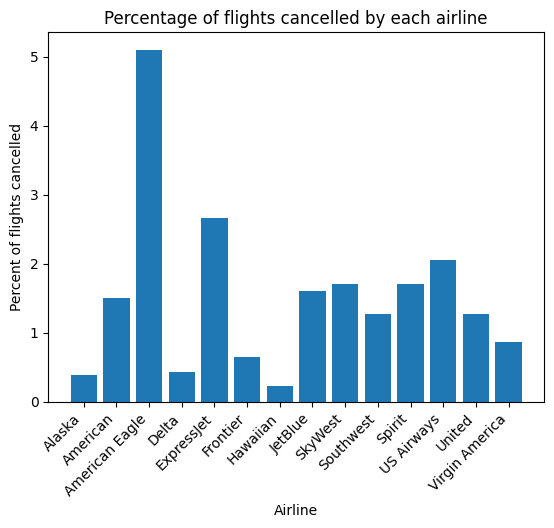

In [89]:
cancelpctbyairline = flights.groupby('AIRLINE')['CANCELLATION_REASON'].apply(lambda x: x.notnull().sum() / len(x) * 100)

plt.bar(cancelpctbyairline.index, cancelpctbyairline.values)
plt.xlabel('Airline')
plt.ylabel('Percent of flights cancelled')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of flights cancelled by each airline')
plt.savefig('Percentage of flights cancelled by each airline.png', bbox_inches='tight')
plt.show()

# REASONS OVERVIEW

### What were the most common reasons for flight cancellation?

In [16]:
cancelled['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
Weather                     48819
Carrier                     25255
National Aviation System    15732
Security                       22
Name: count, dtype: int64

### What percentage of overall cancellations was due to each reason?

In [17]:
reasonpcts = cancelled['CANCELLATION_REASON'].value_counts(normalize=True) * 100
reasonpcts

CANCELLATION_REASON
Weather                     54.347197
Carrier                     28.114842
National Aviation System    17.513470
Security                     0.024491
Name: proportion, dtype: float64

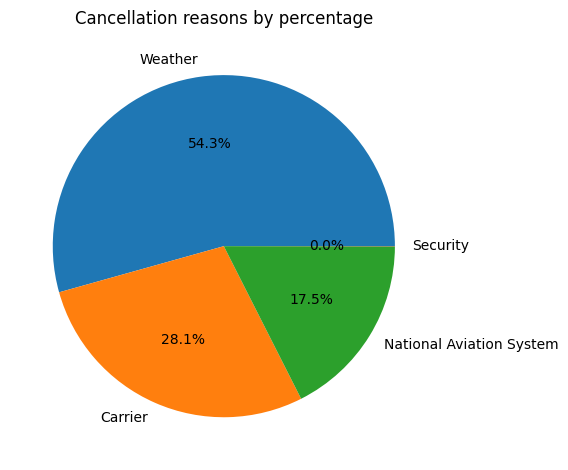

In [18]:
plt.pie(reasonpcts, labels=reasonpcts.index, autopct='%1.1f%%')
plt.title('Cancellation reasons by percentage')
plt.tight_layout()
plt.savefig('Cancellation reasons by percentage')
plt.show()

# BY AIRPORT

### Which airports had the highest percentage of arriving flights cancelled?

In [19]:
(flights.groupby('DESTINATION_AIRPORT')['CANCELLATION_REASON']
    .apply(lambda x: 100 * x.notnull().sum() / len(x))
    .sort_values(ascending=False)
    .head(20)
)

DESTINATION_AIRPORT
Ithaca Tompkins International Airport           11.428571
Mammoth Yosemite Airport                        10.256410
Devils Lake Regional Airport                     7.142857
Adak Airport                                     6.666667
Houghton County Memorial Airport                 6.584362
Muskegon County Airport                          6.584362
Lawton-Fort Sill Regional Airport                6.396149
St Cloud Regional Airport                        6.097561
Texarkana Regional-Webb Field                    5.921053
Barkley Regional Airport                         5.769231
Eugene F Kranz Toledo Express Airport            5.719733
Dubuque Regional Airport                         5.615764
Kodiak Airport                                   5.295316
Jack Mc Namara Field                             5.263158
Kalamazoo/Battle Creek International Airport     5.083884
Roswell Air Center Airport                       4.976526
Jack Brooks Regional Airport                     4.9

### Which airports had the highest percentage of departing flights cancelled?

In [20]:
(flights.groupby('ORIGIN_AIRPORT')['CANCELLATION_REASON']
    .apply(lambda x: 100 * x.notnull().sum() / len(x))
    .sort_values(ascending=False)
    .head(20)
)

ORIGIN_AIRPORT
Ithaca Tompkins International Airport    11.764706
Mammoth Yosemite Airport                 10.256410
Friedman Memorial Airport                 8.840864
Jack Mc Namara Field                      8.421053
Devils Lake Regional Airport              8.013937
Aspen-Pitkin County/Sardy Field           7.649820
Lawton-Fort Sill Regional Airport         6.804124
Muskegon County Airport                   6.721536
Adak Airport                              6.666667
Jamestown Regional Airport                6.651635
Northeast Florida Regional Airport        6.508876
Houghton County Memorial Airport          6.438356
Barkley Regional Airport                  6.318681
Texarkana Regional-Webb Field             6.191370
Eugene F Kranz Toledo Express Airport     6.190476
Jack Brooks Regional Airport              6.132075
St Cloud Regional Airport                 6.024096
Dubuque Regional Airport                  5.714286
Roswell Air Center Airport                5.534709
Kodiak Airport  

# BY DAY AND MONTH

### Which days of the week had the highest percentage of flights cancelled?

In [21]:
(flights.groupby('DAY_OF_WEEK')['CANCELLATION_REASON']
    .apply(lambda x: 100 * x.notnull().sum() / len(x))
    .sort_values(ascending=False)
    .head(20)
)

DAY_OF_WEEK
Monday       2.436020
Tuesday      1.784290
Sunday       1.610242
Thursday     1.409488
Wednesday    1.253721
Saturday     1.249111
Friday       1.021987
Name: CANCELLATION_REASON, dtype: float64

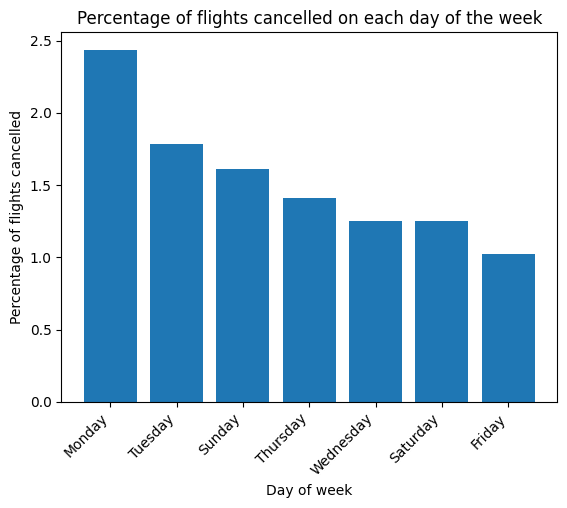

In [22]:
daycancelpct = (flights.groupby('DAY_OF_WEEK')['CANCELLATION_REASON']
    .apply(lambda x: 100 * x.notnull().sum() / len(x))
    .sort_values(ascending=False)
    .head(20)
)

plt.bar(daycancelpct.index, daycancelpct.values)
plt.xlabel('Day of week')
plt.ylabel('Percentage of flights cancelled')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of flights cancelled on each day of the week')
plt.savefig('Percentage of flights cancelled on each day of the week.png', bbox_inches='tight')
plt.show()

### What was the breakdown of reasons for each day of the week?

In [23]:
cancelled.groupby('DAY_OF_WEEK')['CANCELLATION_REASON'].value_counts(normalize=True) * 100 

DAY_OF_WEEK  CANCELLATION_REASON     
Friday       Weather                     44.848347
             Carrier                     38.657276
             National Aviation System    16.437578
             Security                     0.056799
Monday       Weather                     60.278200
             Carrier                     20.974174
             National Aviation System    18.728637
             Security                     0.018990
Saturday     Weather                     54.242909
             Carrier                     30.215005
             National Aviation System    15.530650
             Security                     0.011436
Sunday       Weather                     62.348917
             Carrier                     23.177499
             National Aviation System    14.473584
Thursday     Weather                     47.818655
             Carrier                     29.065603
             National Aviation System    23.115741
Tuesday      Weather                     55.

### Which month had the most flights cancelled?

In [24]:
cancelled['MONTH'].value_counts()

MONTH
February     20489
January      11978
March        11000
June          9118
December      8060
May           5694
August        5052
July          4804
November      4591
April         4516
October       2451
September     2075
Name: count, dtype: int64

### Which month had the highest percentage of flights cancelled?

In [25]:
(flights.groupby('MONTH')['CANCELLATION_REASON']
    .apply(lambda x: 100 * x.notnull().sum() / len(x))
    .sort_values(ascending=False)
    .head(20)
)

MONTH
February     4.779088
January      2.551486
March        2.183549
June         1.811219
December     1.683175
May          1.146819
August       0.990443
November     0.981946
April        0.931743
July         0.923455
October      0.504608
September    0.446629
Name: CANCELLATION_REASON, dtype: float64

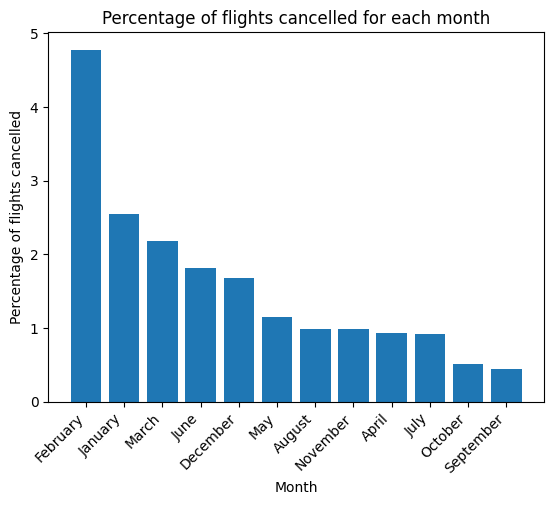

In [26]:
monthcancelpct = (flights.groupby('MONTH')['CANCELLATION_REASON']
    .apply(lambda x: 100 * x.notnull().sum() / len(x))
    .sort_values(ascending=False)
    .head(20)
)

plt.bar(monthcancelpct.index, monthcancelpct.values)
plt.xlabel('Month')
plt.ylabel('Percentage of flights cancelled')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of flights cancelled for each month')
plt.savefig('Percentage of flights cancelled for each month.png', bbox_inches='tight')
plt.show()

### What was the breakdown of reasons for each month?

In [27]:
cancelled.groupby('MONTH')['CANCELLATION_REASON'].value_counts(normalize=True) * 100

MONTH      CANCELLATION_REASON     
April      Carrier                     39.769708
           Weather                     39.592560
           National Aviation System    20.637733
August     Carrier                     46.793349
           National Aviation System    27.236738
           Weather                     25.930325
           Security                     0.039588
December   Weather                     69.615385
           Carrier                     19.590571
           National Aviation System    10.794045
February   Weather                     75.284299
           Carrier                     13.734199
           National Aviation System    10.976622
           Security                     0.004881
January    Weather                     58.607447
           Carrier                     23.993989
           National Aviation System    17.390215
           Security                     0.008349
July       Carrier                     53.830142
           National Aviation Syst

### February had the most cancellations of any month. Which days in February saw the most?

In [28]:
february = cancelled[cancelled['MONTH'].str.contains('February')]
february['DAY_OF_MONTH'].value_counts()

DAY_OF_MONTH
2     2799
1     1979
15    1373
23    1319
9     1255
25    1185
16    1178
28    1170
21     934
17     866
27     809
26     771
24     771
22     748
3      599
8      471
14     456
5      367
20     303
4      262
6      231
10     186
18     143
19     118
7       63
13      49
11      47
12      37
Name: count, dtype: int64

# BY REASON: CARRIER

In [29]:
reason_carrier = cancelled[cancelled['CANCELLATION_REASON'].str.contains('Carrier')]

### How many cancellations per airline were due to the carrier?

In [30]:
reason_carrier['AIRLINE'].value_counts()

AIRLINE
Southwest         6122
ExpressJet        3604
SkyWest           3198
American          2879
United            2870
American Eagle    2475
US Airways        1007
JetBlue            883
Spirit             654
Delta              594
Alaska             334
Frontier           308
Hawaiian           170
Virgin America     157
Name: count, dtype: int64

In [31]:
reason_carrier['ORIGIN_AIRPORT'].value_counts()

ORIGIN_AIRPORT
Dallas-Fort Worth International Airport    1546
Chicago O'Hare International Airport       1465
Los Angeles International Airport          1347
Laguardia Airport                          1205
San Francisco International Airport         910
                                           ... 
Mammoth Yosemite Airport                      1
Guam International Airport                    1
St Cloud Regional Airport                     1
Greater Binghamton/Edwin A Link Field         1
Bert Mooney Airport                           1
Name: count, Length: 307, dtype: int64

In [32]:
reason_carrier['DESTINATION_AIRPORT'].value_counts()

DESTINATION_AIRPORT
Dallas-Fort Worth International Airport    1964
Chicago O'Hare International Airport       1939
Los Angeles International Airport          1376
Laguardia Airport                          1186
San Francisco International Airport        1029
                                           ... 
Columbus Airport                              1
Bangor International Airport                  1
Northeast Wyoming Regional Airport            1
Mercedita Airport                             1
Ralph Wien Memorial Airport                   1
Name: count, Length: 296, dtype: int64

In [33]:
reason_carrier['MONTH'].value_counts()

MONTH
June         3619
January      2874
February     2814
July         2586
March        2494
August       2364
May          2007
April        1796
December     1579
September    1088
November     1083
October       951
Name: count, dtype: int64

# BY REASON: WEATHER

In [34]:
reason_weather = cancelled[cancelled['CANCELLATION_REASON'].str.contains('Weather')]

### How many cancellations per airline were due to weather?

In [35]:
reason_weather['AIRLINE'].value_counts()

AIRLINE
American Eagle    9164
Southwest         8843
American          7306
SkyWest           5517
ExpressJet        5072
United            3312
Delta             2973
US Airways        2490
JetBlue           2464
Spirit            1068
Alaska             317
Frontier           280
Virgin America      12
Hawaiian             1
Name: count, dtype: int64

### How many arriving flights were cancelled per airport due to weather?

In [36]:
reason_weather['DESTINATION_AIRPORT'].value_counts()[:20]

DESTINATION_AIRPORT
Dallas-Fort Worth International Airport                         5061
Chicago O'Hare International Airport                            4958
Laguardia Airport                                               2102
General Edward Lawrence Logan International Airport             1879
Hartsfield - Jackson Atlanta International Airport              1785
Denver International Airport                                    1413
Chicago Midway International Airport                            1376
George Bush Intcntl/Houston Airport                             1324
Newark Liberty International Airport                            1244
John F Kennedy International Airport                            1106
Ronald Reagan Washington Ntl Airport                            1044
Baltimore/Washington International Thurgood Marshall Airport    1023
San Francisco International Airport                              960
Philadelphia International Airport                               753
Detroit Metro 

### How many outbound flights were cancelled per airport due to weather?

In [37]:
reason_weather['ORIGIN_AIRPORT'].value_counts()[:20]

ORIGIN_AIRPORT
Dallas-Fort Worth International Airport                         4984
Chicago O'Hare International Airport                            4788
Laguardia Airport                                               2205
General Edward Lawrence Logan International Airport             1885
Hartsfield - Jackson Atlanta International Airport              1716
Chicago Midway International Airport                            1448
Denver International Airport                                    1381
George Bush Intcntl/Houston Airport                             1227
Newark Liberty International Airport                            1169
John F Kennedy International Airport                            1106
Ronald Reagan Washington Ntl Airport                            1080
Baltimore/Washington International Thurgood Marshall Airport    1042
San Francisco International Airport                              911
Philadelphia International Airport                               764
Charlotte/Douglas I

In [38]:
reason_weather['MONTH'].value_counts()

MONTH
February     15425
January       7020
March         6864
December      5611
June          3324
May           2780
November      2333
April         1788
August        1310
October        977
July           882
September      505
Name: count, dtype: int64

# BY REASON: NATIONAL AVIATION SYSTEM

In [39]:
reason_nas = cancelled[cancelled['CANCELLATION_REASON'].str.contains('National Aviation System')]

### How many cancellations per airline were due to NAS?

In [40]:
reason_nas['AIRLINE'].value_counts()

AIRLINE
ExpressJet        6535
American Eagle    3385
SkyWest           1208
Southwest         1066
JetBlue            928
American           730
US Airways         570
United             391
Virgin America     365
Spirit             279
Delta              257
Alaska              18
Name: count, dtype: int64

In [41]:
reason_nas['DESTINATION_AIRPORT'].value_counts()

DESTINATION_AIRPORT
Chicago O'Hare International Airport                2453
Newark Liberty International Airport                1736
Laguardia Airport                                   1245
George Bush Intcntl/Houston Airport                  567
John F Kennedy International Airport                 544
                                                    ... 
Henry E Rohlsen Airport                                1
Columbus Airport                                       1
Yellowstone Regional Airport                           1
Idaho Falls Regional Airport                           1
California Redwood Coast-Humboldt County Airport       1
Name: count, Length: 241, dtype: int64

In [42]:
reason_nas['ORIGIN_AIRPORT'].value_counts()

ORIGIN_AIRPORT
Chicago O'Hare International Airport    2345
Newark Liberty International Airport    1654
Laguardia Airport                       1245
John F Kennedy International Airport     547
George Bush Intcntl/Houston Airport      488
                                        ... 
Garden City Regional Airport               1
Central Nebraska Regional Airport          1
Laramie Regional Airport                   1
Yuma Mcas/Yuma International Airport       1
Mammoth Yosemite Airport                   1
Name: count, Length: 243, dtype: int64

In [43]:
reason_nas['MONTH'].value_counts()

MONTH
February     2249
June         2175
January      2083
March        1637
August       1376
July         1335
November     1164
April         932
May           906
December      870
October       523
September     482
Name: count, dtype: int64

##### What happened in June? Clearly not winter weather related. Can we find a particular day in June with a lot of NAS cancellations?

In [44]:
june_nas = reason_nas.loc[reason_nas['MONTH'] == "June"]
june_nas['DAY_OF_MONTH'].value_counts()

DAY_OF_MONTH
15    419
22    238
1     226
8     200
23    190
16    190
17    132
12     82
30     77
7      58
20     55
9      47
18     45
2      33
24     24
14     24
19     17
27     17
5      13
13     12
26     10
21     10
4      10
11      9
25      8
3       6
10      6
28      6
29      6
6       5
Name: count, dtype: int64

### The four top days in June for NAS cancellations were all Mondays. Does this trend persist throughout the entire year?

In [45]:
reason_nas['DAY_OF_WEEK'].value_counts()

DAY_OF_WEEK
Monday       3945
Thursday     2840
Tuesday      2318
Wednesday    1920
Sunday       1904
Friday       1447
Saturday     1358
Name: count, dtype: int64

In [77]:
february = cancelled.loc[cancelled['MONTH'] == 'February']
february['AIRLINE'].value_counts(normalize=True) * 100

AIRLINE
American Eagle    18.971155
Southwest         16.857826
ExpressJet        14.593196
American          12.465225
Delta              8.277612
US Airways         7.682171
SkyWest            6.769486
JetBlue            6.325345
United             4.909952
Spirit             1.298258
Virgin America     0.756503
Alaska             0.551515
Frontier           0.527112
Hawaiian           0.014642
Name: proportion, dtype: float64